# Detecting Malaria

## Abstract

Using publicly available image data from kaggle, this project aimed to create a model for identifying images of malaria infected cells as compaired to healthy cells. The data contained 4958 training images and 2600 test images of varying size, around 180x180px, resulting in 334mb of data.

Using a neural network model, I tested a range of hyperparameters (padding, activation function, input units, number of layers, and optimizers) to train a model with the highest possible accuracy. The resulting model had valid padding, a relu activation function, an additional data augmentation layer (to prevent overfitting), and four 2D convolutional layers, along with four maxpooling layers. The final model also contained a dropout layer with a 20% rate to minimize overfitting and used SGD as the optimizer. 

The resulting validation accuracy on the model was between 96-97%, very close to my target. My test accuracy was slightly lower, at 95.2%.

## Introduction test images

Malaria is a parasitic disease which can be fatal if not treated propperly. Transmitted via a mosquito vector, malaria disproportionately impacts poor, subtropical areas and is the leading cause of death in many developing countries (Ahmad & Ahmad, 2020). As a result, any intervention that may improve detection and treatment of Malaria with minimal cost, would have a positive impact on at risk populations in these areas. Currently, the primary methods of diagnosing Malaria is based upon detection of antibiodies in the serum of the blood using microscopy, serology, or a rapid diagnostic test. There are several drawbacks to these methods, microscopy and serology are time and effort intensive, as well as limited by the quality of those performing the test. And while RDTs are much faster, they are less accurate than the other two methods (CDC.gov, 2020; Wilson, 2013). Using a dataset of labeled cell images, some with the malaria infection, and some healthy cells, I aim with this project to train a neural network model that will detect the infected cells with a high degree of accuracy and precision. Accuracy of laboratory testing for Malaria varies, but a recent study found an accuracy from a Belgium lab to be around 97%-98%. It is therefore my goal to obtain at least an accuracy of 97%, in other words, successfully labelling 97% of positive cases as positive, with my model. 

By creating a model that can detect the infection from a photo, I hope to reduce the amount of human expertise required to diagnose a patient, often meaning that patients need to wait while laboratory staff manually examine samples, and instead replace it with a much faster process, whereby a photo of the sample, taken with a microscope, can be run through the model and a determination quickly produced. As a result, providing faster results and greater capacity in the pipeline. 

#### Research Question: 

The question to be addressed in this process is as follows:

1. Using only a photo of a blood cell, can I predict with a level of acccuracy equivalent to or higher than microscopy in a lab (97%), whether a Malaria infection is present? 

## Data Used

The data used were collected from Kaggle: https://www.kaggle.com/syedamirraza/malaria-cell-image?select=cell_images
They consist of labeled images of malaria infected and healthy cells. 

### Motivation

There were several factors that led to my decision to use this image data. First, was the specific desire to work with image data and train a model using image data because that is a skill I have not used in the past. A general interest in population health data led me on a search for data in that field. I ultimately decided on the Malaria image dataset because the data were new, in that they had been posted only recently, and no one else had performed analyses or posted any models yet. The novelty meant that I ould be among the first people to examine and potentially produce a model using these data, which was appealing. 

### Proposed Method

I propose to use tensorflow and keras in order to train and tune a classification model on the provided images. I propose to compare multiple model parameters as described below
   - padding ('same', 'valid')
   - activation fuctions ('relu', 'swish', 'leakyRelu')
   - adding and removing convolutional layers
   - optimization function ('adam','Adamax', 'Nadam', 'SGD')

Initially I performed these comparisons manually, which can be seen in the exploratory analysis notebook. However, upon narrowing down a few of these parameters, I used tensorboard to compare the outcomes for the remaining parameters.

I created versions of this in both Jupyter notebook and google Colab. The reason for this was the ability to use high Ram GPU in the google colab environment which allowed me to train and compare models significantly quicker than on my local machine.
    
### Data Cleaning and Acquisition

Find the Data Cleaning notebook here: <a href = 'https://github.com/Jcc329/Classifying-Malaria-Infected-Cells-Using-Neural-Networks/blob/main/Jupyter%20Notebooks/Data%20Cleaning%20_%20Final%20Project.ipynb'>Data Cleaning Notebook</a>

### Exploratory Analysis and Modeling

Detailed exploratory analysis Jupyter Notebook here: <a href = 'https://github.com/Jcc329/Classifying-Malaria-Infected-Cells-Using-Neural-Networks/blob/main/Jupyter%20Notebooks/Exploratory%20Analysis_Final%20Project.ipynb'>Exploratory Analysis Notebook</a>

Detailed exploratory analysis Google Colab Notebook here: <a href = 'https://colab.research.google.com/drive/11Me6TJWDqCsK-7zHNAliLxNJS2_HFwJU?usp=sharing'>Exploratory Analysis Notebook</a>

For a brief review of the data exploration, including demonstrations of the models attempted, scroll down.

#### Limitations and Furture Research

Future reasearch could be aimed at expanding the methodologies used here to train the model on a range of blood infections, thus allowing the model to identify several different possible diagnoses, rather than just Malaria, from a single sample. As a result, a single image of a sample could potentially be used to rule out, or rule in, several different diagnoses at once, a vast improvement on many of the models currently in existence. 

## References and Contributions:

Ahmad, A., & Ahmad, S. (2020). Taming the beast: Update on Malaria Research. molecules, 7(07).

“CDC - Malaria - Diagnostic Tools.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 19 Feb. 2020, www.cdc.gov/malaria/diagnosis_treatment/diagnostic_tools.html. 

Wilson, M. L. (2013). Laboratory diagnosis of malaria: conventional and rapid diagnostic methods. Archives of Pathology and Laboratory Medicine, 137(6), 805-811.

Blogs, Tutorials, and webpages:
https://www.tensorflow.org/tutorials/images/classification

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363

https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks

In [1]:
#Import libraries
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Set my data directory for the test and train data (test will be used later) 
train_data_dir = "C:/Users/15856/Data 602/FinalProject/Cell_Images/cell_images/train"
train_data_dir = pathlib.Path(train_data_dir)

test_data_dir = "C:/Users/15856/Data 602/FinalProject/Cell_Images/cell_images/test"
test_data_dir = pathlib.Path(test_data_dir)

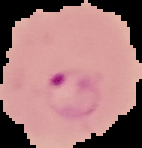

In [3]:
#Quick visualization of what the images look like

parasitized = list(train_data_dir.glob('parasitized/*'))
PIL.Image.open(str(parasitized[0]))

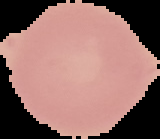

In [4]:
uninfected = list(train_data_dir.glob('uninfected/*'))
PIL.Image.open(str(uninfected[0]))

In [5]:
#split my training data into training and validation sets
batch_size = 32
img_height = 200
img_width = 200


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.1, #about 2000 images seems like a good validation set to me
  subset="training",
  seed=1212020,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24958 files belonging to 2 classes.
Using 22463 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.1,
  subset="validation",
  seed=1212020,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24958 files belonging to 2 classes.
Using 2495 files for validation.


In [7]:
#prepare my test data for evaluating the model later
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=1212020,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['parasitized', 'uninfected']


In [9]:
# This stage of the data preparation, using AUTOTUNE, is for optimizing performance and allows the tf.data to tune the value dynamically
#https://www.tensorflow.org/guide/data_performance
# The cache function keeps the data in memory after the first epoch which presents bottlenecking during training
#the prefectch function overlaps the data preproccessing with training the model

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Brief Exploratory Analysis

The plan for my exploratory analysis was:
- perform feature engineering to prepare the image data
- create normalization layer
- experiment with layer for data augmentation etc. to reduce overfitting
- experiment with hyperparameters
    - padding ('same', 'valid')
    - activation fuctions ('relu', 'swish', 'leakyRelu')
    - adding and removing convolutional layers
    - optimization function ('adam','Adamax', 'Nadam', 'SGD')

The resulting model with the best performance had the following parameters:

- Valid padding
- relu activation functions
- 5 convolutional and maxpoolling layers
- Nadam optimization (in the tensorboard comparison, Nadam was the optimizer for 3 of the top 4 performing models)

You can see the entire experimental analysis process here:
The tensorboard comparison of models is implemented in google colab: https://colab.research.google.com/drive/11Me6TJWDqCsK-7zHNAliLxNJS2_HFwJU?usp=sharing

I recommend using the google colab notebook, as it offers the use of GPUs which greatly impmroves implementationi time.

I will include only the best model and the final evaluation below

In [10]:
#create my data augmentation layer, this helps to prevent overfitting by rotating and flipping the images
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

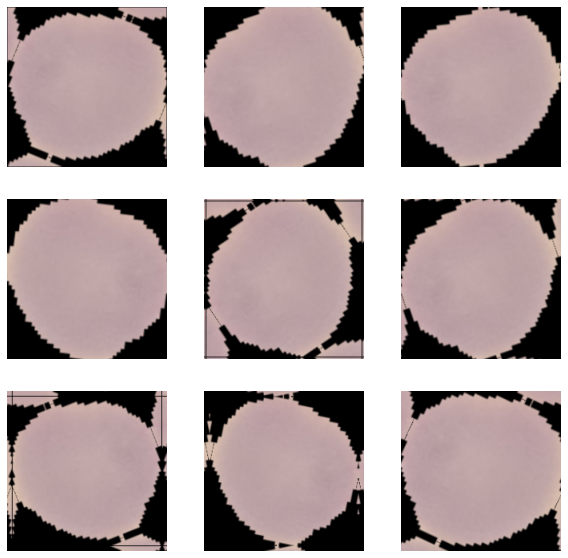

In [11]:
#view the rotated images

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [12]:
#My final model
model = Sequential([
  data_augmentation,#my additional data augmentation layer
  layers.experimental.preprocessing.Rescaling(1./255), #This layer rescales the RGB channels from a range of 1-255 to a range of 0-1
  layers.Conv2D(16, 3, padding='valid', activation='relu'),#2d convolutional layer over spacial images
  layers.MaxPooling2D(),#max pooling layer for 2D spacial data
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),#This layer helps to avoid overfitting by randomly setting input units to zero at a rate of 20%
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [13]:
model.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# I want to get the highest accuracy model and not perform a ton of extra epocs.
#therefore, I will use the callbacks function to set a stopping parameter in my training
#Used https://colab.research.google.com/drive/171WSgSJRAbk93AyspLvrj3HpPZkeMuK2?usp=sharing#scrollTo=MsTQjo7yCEid 
#from lecture 13 for guidance on this

callbacks = [keras.callbacks.EarlyStopping(min_delta = .01, patience = 5),
            keras.callbacks.ModelCheckpoint(filepath = 'model.{epoch:02d}-{val_loss:.2f}.h5')]

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = callbacks
)

Epoch 1/30
702/702 [==============================] - 578s 823ms/step - loss: 0.6203 - accuracy: 0.6070 - val_loss: 0.1882 - val_accuracy: 0.9443
Epoch 2/30
702/702 [==============================] - 613s 873ms/step - loss: 0.1826 - accuracy: 0.9429 - val_loss: 0.1277 - val_accuracy: 0.9595
Epoch 3/30
702/702 [==============================] - 620s 883ms/step - loss: 0.1520 - accuracy: 0.9515 - val_loss: 0.1302 - val_accuracy: 0.9607
Epoch 4/30
702/702 [==============================] - 681s 971ms/step - loss: 0.1476 - accuracy: 0.9549 - val_loss: 0.1356 - val_accuracy: 0.9615
Epoch 5/30
702/702 [==============================] - 645s 918ms/step - loss: 0.1394 - accuracy: 0.9545 - val_loss: 0.1166 - val_accuracy: 0.9651
Epoch 6/30
702/702 [==============================] - 727s 1s/step - loss: 0.1347 - accuracy: 0.9559 - val_loss: 0.1147 - val_accuracy: 0.9651
Epoch 7/30
702/702 [==============================] - 791s 1s/step - loss: 0.1336 - accuracy: 0.9561 - val_loss: 0.1224 - val_a

In [15]:
#visualize the epochs

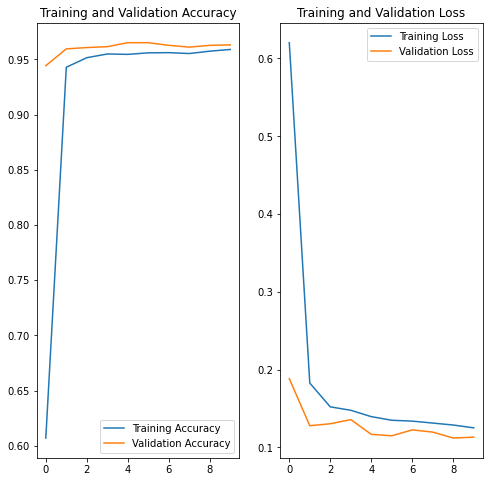

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate the accuracy of the model on test data

In [18]:
model.evaluate(test_ds)

82/82 [==============================] - 18s 217ms/step - loss: 0.1380 - accuracy: 0.9523


[0.1379820555448532, 0.9523077011108398]

## Conclusions

While I was not able to train the model to a target accuracy of 97%, I was able to get to a test accuracy of about 95.2%. Despite being lower than the accuracy produced by lab studies, using a model like this would still provide some benefits. For example, running an image into the model and receiving a prediction would still occur in a faster time frame than the time needed to send a sample to a lab to be processed. In addition, the accuracy is far better than the current rapid tests, which means that this could be a potential replacement for those tests, saving time and therefore money in the diagnosis process of malarial treatment. 

Through this project I was able to gain a lot of experience using image data in python as well as using the tensorflow and keras libraries. I feel like I have gained a firmer grasp of the architectural components of neural networks, how they change, and what the benefits of different variations are. This has been an extremely interesting, not to mention fun, project and I feel like I was able to use and gain experience with a lot of novel concepts and  their applications.